In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = load_digits()
X = data.data
y = data.target

In [4]:
print X.shape
print y.shape

(1797L, 64L)
(1797L,)


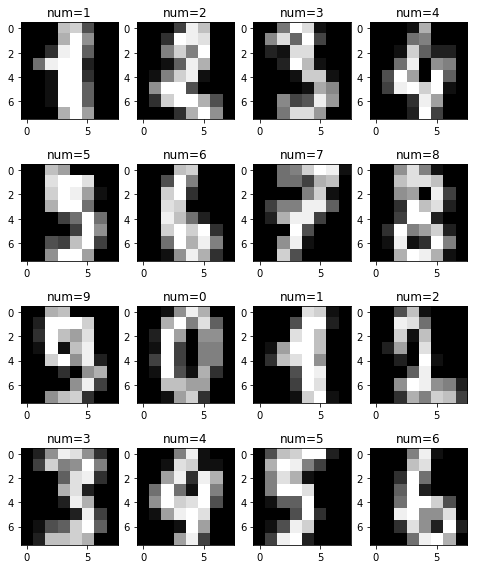

In [52]:
plt.figure(figsize(8, 10))

plt.gray()
rows = 4
cols = 4
plot_number = 0
for row in xrange(rows):
    for col in xrange(cols):
        plot_number += 1
        plt.subplot(rows, cols, plot_number)
        plt.title('num='+str(data.target[plot_number]))
        plt.imshow(data.images[plot_number])

In [46]:
estimator = DecisionTreeClassifier()
score = cross_val_score(estimator, X, y, cv=10)
print score
with open('ans1.txt', 'w') as foutput:
    foutput.write(str(score.mean()))

[ 0.77297297  0.87431694  0.81767956  0.82777778  0.78212291  0.86592179
  0.88826816  0.80898876  0.81355932  0.83522727]


In [47]:
bagger = ensemble.BaggingClassifier(base_estimator=estimator, n_estimators=100)
score = cross_val_score(bagger, X, y, cv=10)
print score
with open('ans2.txt', 'w') as foutput:
    foutput.write(str(score.mean()))

[ 0.87567568  0.95628415  0.91160221  0.95        0.90502793  0.98324022
  0.95530726  0.91011236  0.86440678  0.91477273]


In [54]:
bagger_new = ensemble.BaggingClassifier(base_estimator=estimator, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
score = cross_val_score(bagger_new, X, y, cv=10)
print score
with open('ans3.txt', 'w') as foutput:
    foutput.write(str(score.mean()))

[ 0.92972973  0.95628415  0.93922652  0.90555556  0.9273743   0.94972067
  0.96089385  0.96629213  0.88700565  0.91477273]


In [55]:
estimator_rand = DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])))
bagger_rand = ensemble.BaggingClassifier(base_estimator=estimator_rand, n_estimators=100)
score = cross_val_score(bagger_rand, X, y, cv=10)
print score
with open('ans4.txt', 'w') as foutput:
    foutput.write(str(score.mean()))

[ 0.9027027   0.9726776   0.95027624  0.95555556  0.94972067  0.97765363
  0.97765363  0.96067416  0.93220339  0.93181818]


In [57]:
estimator_randf = ensemble.RandomForestClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
cross_val_score(estimator_randf, X, y, cv=10).mean()

0.95111923397925102

In [67]:
# Выполняется минут 5

trees = np.arange(0, 550, 50)
trees_res = []
for tree_num in trees[1:]:
    estimator_randf = ensemble.RandomForestClassifier(n_estimators=tree_num, max_features=int(np.sqrt(X.shape[1])))
    trees_res.append(cross_val_score(estimator_randf, X, y, cv=10, n_jobs=4).mean())
    
features = np.arange(1, X.shape[1], 2)
features_res = []
for feature_num in features:
    estimator_randf = ensemble.RandomForestClassifier(n_estimators=100, max_features=feature_num)
    features_res.append(cross_val_score(estimator_randf, X, y, cv=10).mean())

depths = np.arange(1, 21, 4)    
depths_res = []
for depth in depths:
    estimator_randf = ensemble.RandomForestClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])), max_depth=depth)
    depths_res.append(cross_val_score(estimator_randf, X, y, cv=10).mean())

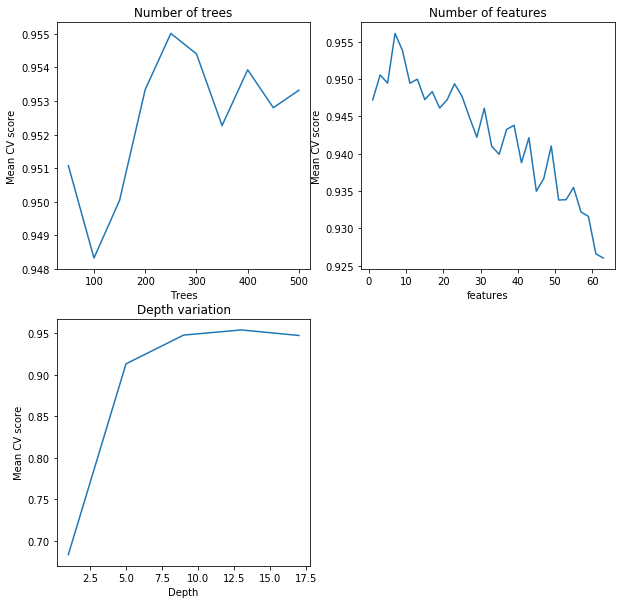

In [71]:
plt.figure(figsize(10,10))

plt.subplot(2,2,1)
plt.title('Number of trees')
plt.xlabel('Trees')
plt.ylabel('Mean CV score')
plt.plot(trees[1:], trees_res)

plt.subplot(2,2,2)
plt.title('Number of features')
plt.xlabel('features')
plt.ylabel('Mean CV score')
plt.plot(features, features_res)

plt.subplot(2,2,3)
plt.title('Depth variation')
plt.xlabel('Depth')
plt.ylabel('Mean CV score')
plt.plot(depths, depths_res)